# Titanic Data Set, More Practice With Pandas
## Cory Nichols - MSDS

In [1]:
# represent nominal and ordinal attributes first
# how we represent data types in computer is very specific
# workbook for titanic data, about 1K people on Titanic
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series

df = pd.read_csv('data/titanic.csv')

# lets look at data types
df.head()
# class, name, sex, age, sibiling or spouse #, ticket, fare, cabin, embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [2]:
# all continuous attributes
# describes data types, floats represent continuous attributes: interval and ratio
# ints represent ordinals normally
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [3]:
# percentage of people that died on titanic
# length of data frame where people died divided by total amt
float(len(df[df.Survived==0]))/ len(df) *100

61.61616161616161

In [228]:
# group by class person came from
# not a complete list, but a good representation of 1K+ passengers
df_grouped = df.groupby('Pclass')
# get the sum of those who survived
print df_grouped.Survived.sum() # where 1 = survived or event
print '----------------------------'
# count all of the records where we have a survived status
print df_grouped.Survived.count()
print '----------------------------'
# get percentage of people who survived by what class theyre in and what ticket was purchased
print (df_grouped.Survived.sum() / df_grouped.Survived.count()) * 100

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
----------------------------
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
----------------------------
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [4]:
# how to break up the age variable into buckets? use pd.cut
# for 3 buckets, must have 4 numbers in range in this case to set boundaries
# e.g., children are 0 to 15, adults 16 to 64, seniors 65 and older (1e6 so 1000000 1M)
df['age_range'] = pd.cut(df.Age,[0, 16, 65, 1e6],3, labels=['child', 'adult', 'senior'])
df.age_range.describe()
# 714 records are classified
# 3 unique types (child, adult, senior)
# top frequency category is adult with 606 instances or objects

count       714
unique        3
top       adult
freq        606
Name: age_range, dtype: object

In [230]:
# now lets group by class and age range, then look at survival rate
df_grouped = df.groupby(['Pclass', 'age_range'])
print 'Percentage of survivors in each group'
print df_grouped.Survived.sum() # get number of people who survived from binary attributed Survived using dot notation
print df_grouped.Survived.count()
print df_grouped.Survived.sum() / df_grouped.Survived.count() * 100

Percentage of survivors in each group
Pclass  age_range
1       child          8
        adult        113
        senior         1
2       child         19
        adult         64
        senior         0
3       child         28
        adult         57
        senior         0
Name: Survived, dtype: int64
Pclass  age_range
1       child          9
        adult        173
        senior         4
2       child         21
        adult        150
        senior         2
3       child         70
        adult        283
        senior         2
Name: Survived, dtype: int64
Pclass  age_range
1       child        88.888889
        adult        65.317919
        senior       25.000000
2       child        90.476190
        adult        42.666667
        senior        0.000000
3       child        40.000000
        adult        20.141343
        senior        0.000000
Name: Survived, dtype: float64


### Dealing with Missing Values

In [5]:
# missing values always common, third class left out, data may not be pertinent, not applicable, eg childrens income
# must take statistics into account for machine learning algorithms
# imputation based on specific cuts of the data, for instance based on class and sibling spouse level
# data may not be collected, e.g. third class details seem to be lacking in this data set
# how do we fill in the values for age based on other demographics?

# lets take out stuff we do not need
del df['PassengerId']
del df['Name']
del df['Cabin']
del df['Ticket']
# now lets group by class and sibsp
df_grouped = df.groupby(['Pclass', 'SibSp'])
df_grouped.describe()

Age        Fare       Parch    Survived
Pclass SibSp                                                      
1      0     count  113.000000  137.000000  137.000000  137.000000
             mean    39.181416   75.223356    0.270073    0.562044
             std     14.844591   87.103081    0.575270    0.497956
             min      4.000000    0.000000    0.000000    0.000000
             25%     28.000000   27.720800    0.000000    0.000000
             50%     37.000000   39.600000    0.000000    1.000000
             75%     50.000000   80.000000    0.000000    1.000000
             max     80.000000  512.329200    2.000000    1.000000
       1     count   65.000000   71.000000   71.000000   71.000000
             mean    37.414154   88.492021    0.422535    0.746479
             std     14.690355   40.307129    0.786711    0.438123
             min      0.920000   39.600000    0.000000    0.000000
             25%     28.000000   56.414600    0.000000    0.500000
             50%     38.000000   79.200000    0.000000    1.000000
             75%     49.000000  108.900000    1.000000    1.000000
             max     70.000000  263.000000    4.000000    1.000000
       2     count    5.000000    5.000000    5.000000    5.000000
             mean    37.200000  159.975840    0.800000    0.800000
             std     16.513631   97.893264    1.095445    0.447214
             min     18.000000   51.479200    0.000000    0.000000
             25%     21.000000   90.000000    0.000000    1.000000
             50%     44.000000  133.650000    0.000000    1.000000
             75%     50.000000  262.375000    2.000000    1.000000
             max     53.000000  262.375000    2.000000    1.000000
       3     count    3.000000    3.000000    3.000000    3.000000
             mean    22.000000  263.000000    2.000000    0.666667
             std      2.645751    0.000000    0.000000    0.577350
             min     19.000000  263.000000    2.000000    0.000000
             25%     21.000000  263.000000    2.000000    0.500000
             50%     23.000000  263.000000    2.000000    1.000000
...                        ...         ...         ...         ...
3      3     std     10.260013    3.811647    0.621582    0.288675
             min      2.000000   15.850000    0.000000    0.000000
             25%      2.750000   21.075000    1.000000    0.000000
             50%      6.000000   25.466700    1.000000    0.000000
             75%      9.250000   27.900000    2.000000    0.000000
             max     33.000000   27.900000    2.000000    1.000000
       4     count   18.000000   18.000000   18.000000   18.000000
             mean     7.055556   31.855556    1.500000    0.166667
             std      4.880601    7.322546    0.514496    0.383482
             min      1.000000    7.925000    1.000000    0.000000
             25%      3.250000   29.662500    1.000000    0.000000
             50%      6.500000   31.275000    1.500000    0.000000
             75%      9.000000   37.612500    2.000000    0.000000
             max     17.000000   39.687500    2.000000    1.000000
       5     count    5.000000    5.000000    5.000000    5.000000
             mean    10.200000   46.900000    2.000000    0.000000
             std      5.805170    0.000000    0.000000    0.000000
             min      1.000000   46.900000    2.000000    0.000000
             25%      9.000000   46.900000    2.000000    0.000000
             50%     11.000000   46.900000    2.000000    0.000000
             75%     14.000000   46.900000    2.000000    0.000000
             max     16.000000   46.900000    2.000000    0.000000
       8     count    0.000000    7.000000    7.000000    7.000000
             mean          NaN   69.550000    2.000000    0.000000
             std           NaN    0.000000    0.000000    0.000000
             min           NaN   69.550000    2.000000    0.000000
             25%           NaN   69.550000    2.000000    0.000000
       

In [6]:
# imputation: lambda function fills in missing values
# lambda is an anonymous function we will call on each column vector associated with a grouping
# go into each group, call lambda
# call grp.fillna, any time we see a missing value, fill with median of group to class
# My takeout so far is that .transform will work (or deal) with Series (columns) in **isolation** from each other. 
# transform will look at the dataframe columns one by one and return back a series (or group of series) 'made' 
# of scalars which are repeated len(input_column) times.
# transform gets rid of data grouping to give original data set in original ordering
# http://stackoverflow.com/questions/27517425/apply-vs-transform-on-a-group-object

df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median())) # pass a function to transform df_grouped
# add back in PClass and SibSp
df_imputed[['Pclass', 'SibSp']] = df[['Pclass','SibSp']]
df_imputed['Sex'] = df['Sex']

print df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Age         884 non-null float64
Parch       891 non-null int64
Fare        891 non-null float64
Pclass      891 non-null int64
SibSp       891 non-null int64
Sex         891 non-null object
dtypes: float64(2), int64(4), object(1)
memory usage: 55.7+ KB
None


In [7]:
df_imputed['age_range'] = pd.cut(df_imputed.Age,[0,16,65,1e6],3,labels = ['child', 'adult', 'senior'])
print df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived     891 non-null int64
Age          884 non-null float64
Parch        891 non-null int64
Fare         891 non-null float64
Pclass       891 non-null int64
SibSp        891 non-null int64
Sex          891 non-null object
age_range    884 non-null category
dtypes: category(1), float64(2), int64(4), object(1)
memory usage: 56.6+ KB
None


In [8]:
# eliminate entries that still have empty values
# if missing value, delete it
df_imputed.dropna(inplace=True)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 8 columns):
Survived     884 non-null int64
Age          884 non-null float64
Parch        884 non-null int64
Fare         884 non-null float64
Pclass       884 non-null int64
SibSp        884 non-null int64
Sex          884 non-null object
age_range    884 non-null category
dtypes: category(1), float64(2), int64(4), object(1)
memory usage: 56.1+ KB


In [9]:
# now lets take a look at our statistics after imputation
df_grouped = df_imputed.groupby(['Pclass','age_range'])
print 'Percentage of Survivors in Each Group, With Imputed Values'
print df_grouped.Survived.sum() / df_grouped.Survived.count() * 100
# roughly the same

Percentage of Survivors in Each Group, With Imputed Values
Pclass  age_range
1       child        88.888889
        adult        62.561576
        senior       25.000000
2       child        90.476190
        adult        42.236025
        senior        0.000000
3       child        37.837838
        adult        22.303922
        senior        0.000000
Name: Survived, dtype: float64


In [10]:
# normalize all of the attributes to fit on SAME SCALE: in this case between 0 and 1
# by taking the value - the minimum of all of the values / max of all values - min of all values
# e.g. min not be zero or max be 10,000 on one var and min of 5MM and max of 100MM on another
# basically places all variables on same scale
# subtract off min, divide by max
# everything b/w 0 and 1 using this method
# data doesnt have to fit completely into memory to call the functions
# however, normally we need zero mean and unit SD, truly normal data set, divide by the standard deviation
# but here is this method anyway!!11

df_sub = df_imputed[['Survived','Age','Pclass','Fare']]
df_normalized = (df_sub - df_sub.min())/(df_sub.max()-df_sub.min()) # call min and max on top of DF

print df_normalized.describe()

         Survived         Age      Pclass        Fare
count  884.000000  884.000000  884.000000  884.000000
mean     0.386878    0.362684    0.651584    0.062281
std      0.487311    0.167234    0.418550    0.097161
min      0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.271174    0.500000    0.015412
50%      0.000000    0.321438    1.000000    0.028213
75%      1.000000    0.459663    1.000000    0.059532
max      1.000000    1.000000    1.000000    1.000000


In [11]:
# let's normalize dataframe across each column vector with a mean of 0 and standard deviation of 1
# standardscaler from sklearn.preprocessing will help us with this
from sklearn.preprocessing import StandardScaler

# create a pure data matrix with values
# .values returns ndarrays from a pandas series, can easily create a data matrix this way:
df_matrix = df_imputed[['Survived', 'Age', 'Pclass', 'Fare']].values

# call standardscaler.fit_transform to normalize entire matrix with mean of 0 and stddev of 1
s_obj = StandardScaler()

# create a matrix of normalized values from previously untransformed values
df_matrix_norm = s_obj.fit_transform(df_matrix)

#df_total = pd.concat([df_imputed, df_matrix_df], axis = 1)

# call axis = 0 for each variables' statistics on column
print df_matrix_norm.std(axis=0)
print df_matrix_norm.mean(axis=0)

[ 1.  1.  1.  1.]
[ -4.11937955e-17   2.49172226e-16   2.13002064e-16   8.03781375e-17]


## Representing Categorical Variables with One Hot Encoding

In [12]:
# pandas has a get_dummies method that will help us with this
tmpdf = pd.get_dummies(df['Sex'], prefix='gender')
tmpdf.head()

,gender_female,gender_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [13]:
tmpdf = pd.get_dummies(df_imputed['Pclass'], prefix = 'class')
tmpdf.head()

,class_1,class_2,class_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [14]:
# import plotting functionality
# bar charts, scatters, advanced plots
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 
# any graphics generated embedded into HTML ith magics line %matplotlib inline
# makes sure any graphics dont generate a separate figure, image and embedded in notebook

Pclass  age_range
1       child        0.888889
        adult        0.625616
        senior       0.250000
2       child        0.904762
        adult        0.422360
        senior       0.000000
3       child        0.378378
        adult        0.223039
        senior       0.000000
Name: Survived, dtype: float64


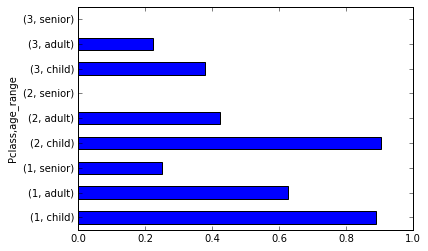

In [15]:
# lets group by class and age range from our imputed data set
df_grouped = df_imputed.groupby(['Pclass','age_range'])
# and calculate a survival rate series
survival_rate = df_grouped.Survived.sum() / df_grouped.Survived.count()
# all we need is to plot survival_rate.plot() and pass a kind = bar horizontal
ax = survival_rate.plot(kind='barh') # this plots survival rate series as a horizontal bar
# it concatenates the Pclass, age_range as labels for each marker
print survival_rate

In [22]:
# now, lets use crosstab in pandas
# create a cross tab by PClass and Age_Range, with true/false for survived
# give crosstab on how we want to group in a list, can be any list
# can be data from anywhere, second parameter is how to be cross tabulated
survival = pd.crosstab([df_imputed['Pclass'], df_imputed['age_range']], df_imputed.Survived.astype(bool))
# we call this a bool in order to make the columns true and false, this works because the values are 0 and 1
print survival

Survived          False  True 
Pclass age_range              
1      child          1      8
       adult         76    127
       senior         3      1
2      child          2     19
       adult         93     68
       senior         2      0
3      child         46     28
       adult        317     91
       senior         2      0


In [24]:
# number of times survived attribute was false or true
# change to percentages, divide survival type into totals for rows
# .div specifies how we want to divide, axis = 0 is rows
# sum(1) says to sum across the entire row and save it as a float
# so in this case, we are dividing across the sum of the rows
# survival.div(take the sum of each row and divide into it each element in the crosstab
# and save as a float type)
# .div is how you divide by rows or columns
survival_rate = survival.div(survival.sum(1).astype(float), axis=0)
# this is for columns: survival_rate = survival.div(survival.sum(0).astype(float), axis=1)
print survival_rate

Survived             False     True 
Pclass age_range                    
1      child      0.111111  0.888889
       adult      0.374384  0.625616
       senior     0.750000  0.250000
2      child      0.095238  0.904762
       adult      0.577640  0.422360
       senior     1.000000  0.000000
3      child      0.621622  0.378378
       adult      0.776961  0.223039
       senior     1.000000  0.000000


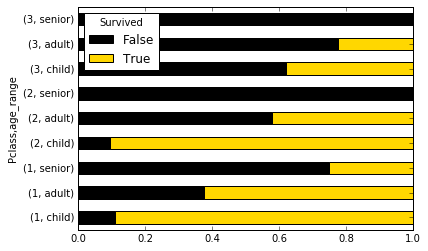

In [25]:
# plot the stacked horizontal bar by calling barh and passing color options:
survival_rate.plot(kind='barh', stacked=True, color=['black','gold'])

In [27]:
# lets crosstab class and gender now
survival_counts = pd.crosstab([df_imputed['Pclass'], df_imputed['Sex']], df_imputed.Survived.astype(bool))
print survival_counts

Survived       False  True 
Pclass Sex                 
1      female      3     91
       male       77     45
2      female      6     70
       male       91     17
3      female     69     72
       male      296     47


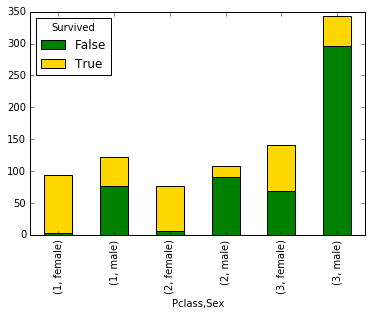

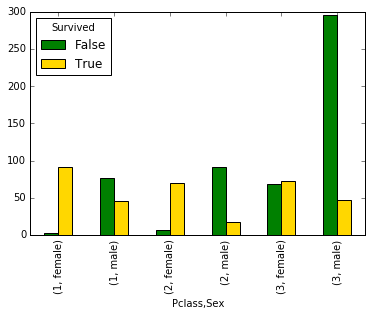

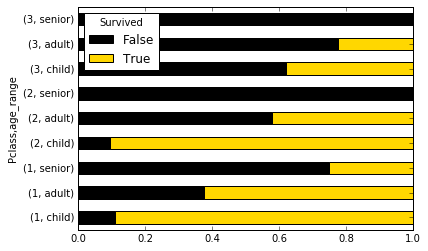

In [28]:
# plot a basic bar chart of the actual counts of survived vs not, stacked in green and gold
survival_counts.plot(kind='bar', stacked=True, color = ['green','gold'])
survival_counts.plot(kind='bar', color = ['green','gold'])

# now plot row percentages of total as horizontal bar chart
survival_rate = survival.div(survival.sum(1).astype(float), axis = 0)
survival_rate.plot(kind = 'barh', stacked=True, color = ['black', 'gold'])

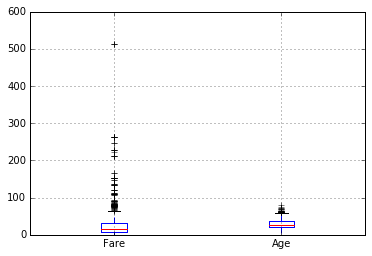

In [32]:
# creating box plots
# only fare and age are continuous and can really be analyzed with boxplot
ax = df_imputed[['Fare','Age']].boxplot(return_type='axes')

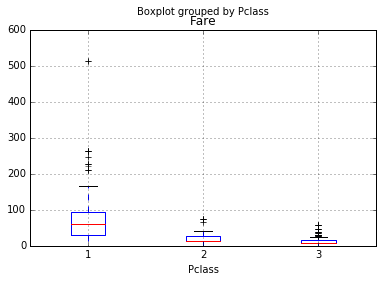

In [33]:
# compute distributions with categories
# lets create boxplots of fare broken down by Pclass
ax = df_imputed.boxplot(column='Fare', by ='Pclass')

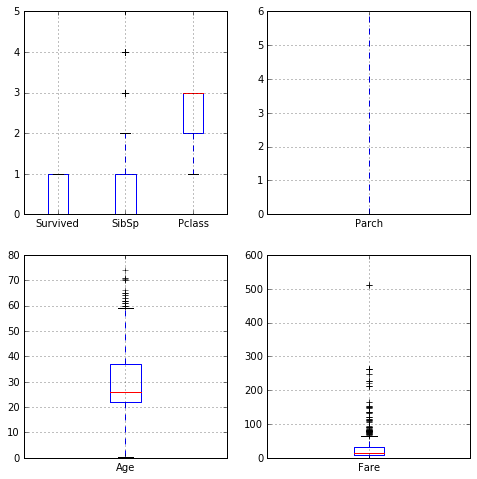

In [37]:
# lets plot multiple boxplots in a subplot figure with matplotlib
# look at boxplots separately
# we will use matplotlib here, break down by subplot
# this method will create 4 SEPARATE plots, not like subplot

vars_to_plot_separate = [['Survived', 'SibSp', 'Pclass'],
                          ['Parch'],
                          ['Age'],
                          ['Fare']]
plt.figure(figsize=(8,8)) # this sets the overall figure size
for index, plot_vars in enumerate(vars_to_plot_separate):
    plt.subplot(len(vars_to_plot_separate) / 2, 2, index + 1) 
                         # subplot takes up the overall figure space, identify # of rows and cols
                         # 0th index takes up first subplot spot
    ax = df_imputed.boxplot(column=plot_vars, return_type='axes') # plot each vars list in list
plt.show()

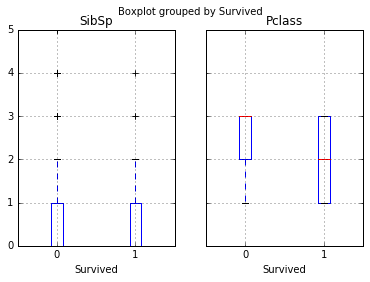

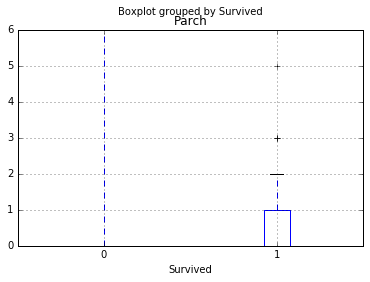

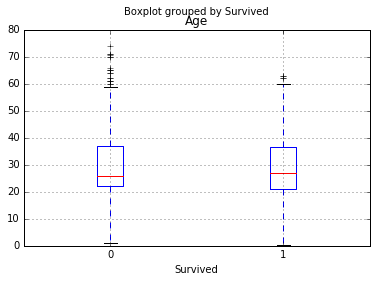

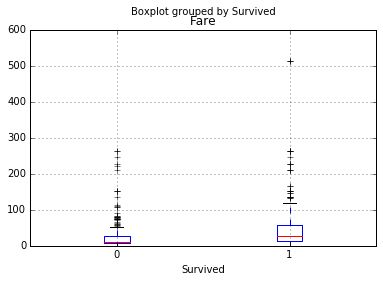

In [38]:
# lets look at boxplots separately, except with easier code this time
# this code plots all of the plots separately

vars_to_plot_separate = [['SibSp','Pclass'],
                         ['Parch'],
                         ['Age'],
                         ['Fare']]

for index, plot_vars in enumerate(vars_to_plot_separate):
    plt.figure(figsize=(4,4)) # each figure's size
    ax = df_imputed.boxplot(column=plot_vars, by='Survived') # plot columns by class and by survived status this time
plt.show()

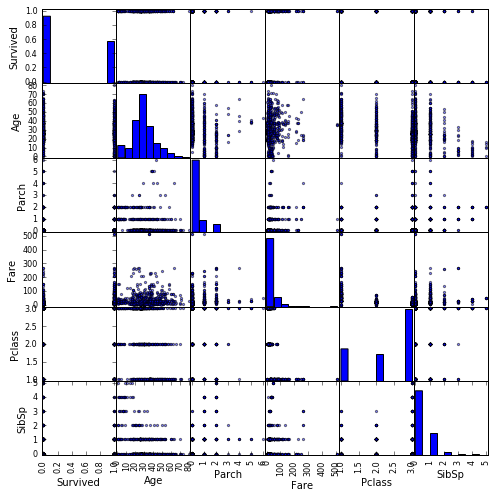

In [39]:
# lots of continuous measures, use scatter_matrix
from pandas.tools.plotting import scatter_matrix

ax = scatter_matrix(df_imputed, figsize=(8,8))

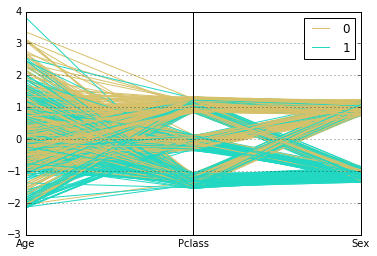

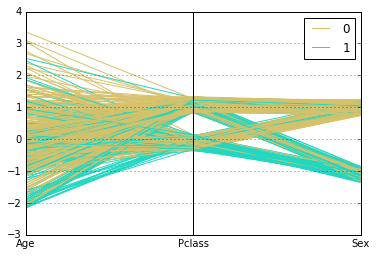

In [47]:
from pandas.tools.plotting import parallel_coordinates

# this type of plot is more meaningful when values are normalized with mean 0 and stddev 1
# parallel_coordinates(df_imputed[['Survived','Age','Pclass','Fare']], 'Survived')

# grab survived, age, pclass, sex only
df_sub = df_imputed[['Survived','Age','Pclass','Sex']]
# change sex to be binary with a conditional
df_sub.Sex = df_sub.Sex == 'male'



# normalize the data by subtracting mean and dividing by standard deviation
df_normalized = (df_sub - df_sub.mean()) / (df_sub.std())

# rescale Survived to 0 and 1 by bringing back in data from other dataframe
df_normalized.Survived = df_sub.Survived

# add some jitter to Pclass and Sex variables
df_normalized.Pclass = df_normalized.Pclass + np.random.rand(*df_normalized.Pclass.shape)/2
df_normalized.Sex = df_normalized.Sex + np.random.rand(*df_normalized.Sex.shape)/2

parallel_coordinates(df_normalized, 'Survived')

# call plt.figure() to create a new figure
plt.figure()
# now lets call parallel coordinates on data where class is > 1
parallel_coordinates(df_normalized[df_sub.Pclass > 1],'Survived')
# need to put like variables next to each other that have some sort of systematic relationship
# limited in how many you can show next to one another

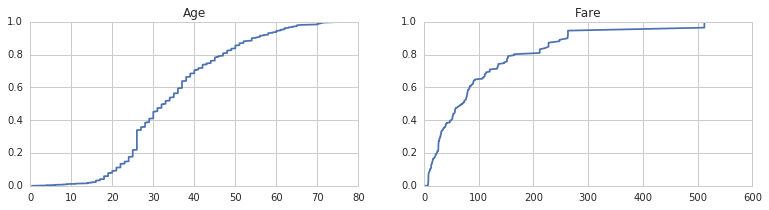

In [314]:
# create empirical cumulative distribution functions to check for normality


# make empirical CDFs
plt.figure(figsize=(20,10))
for index, feature in enumerate(['Age','Fare']):
    plt.subplot(3, 3 , index + 1) # cant start at zero
    x_ax = np.sort(df_imputed[feature]) # sort the feature ascending
    y_ax = np.cumsum(x_ax) # take cumulative sum, this creates an array of each observation adding to total sum
    y_ax = y_ax / np.max(y_ax) # get each observation's percentage of total sum of attribute
    plt.plot(x_ax,y_ax) # plot it
    plt.title(feature) # give it a title
    
plt.show()

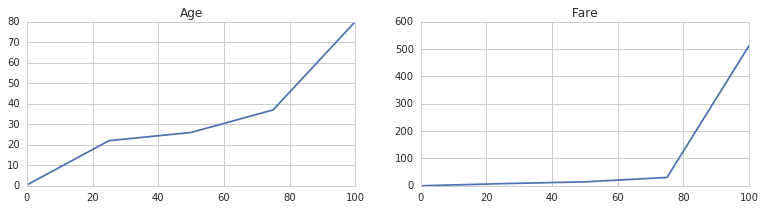

In [317]:
# make percentile plots
plt.figure(figsize=(20,10))
for index ,feature in enumerate(['Age','Fare']):
    plt.subplot(3,3,index +1)
    x_ax = np.linspace(0,100,5)# set percentiles
    y_ax = [np.percentile(df_imputed[feature], x_val) for x_val in x_ax] # list comprehension, find percentile for each
    # percentile defined in x_ax 
    plt.plot(x_ax,y_ax) # plot percentiles on x, y values on y
    plt.title(feature) # give title
    
plt.show()

In [49]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap = True) # one of many color mappings
# diverging palette takes over plotting tools in matplotlib
# now try plotting some of the previous plots

/Users/patrickcorynichols/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


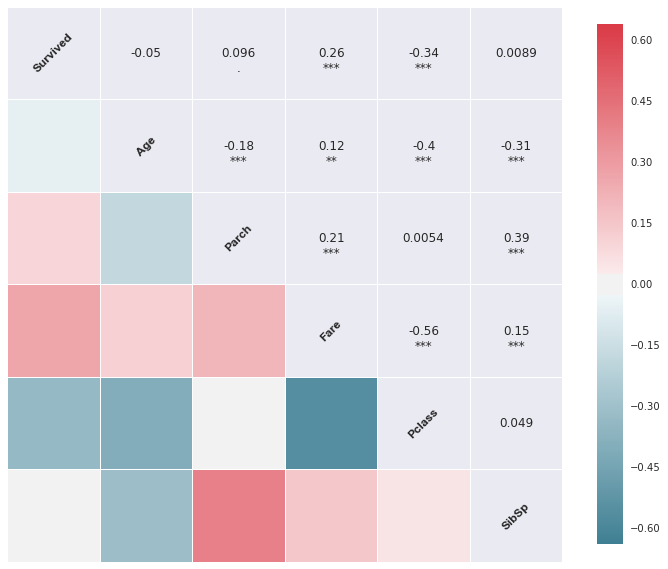

In [53]:
# lets create a correlation plot
sns.set(style= 'darkgrid') # one of many styles

f, ax = plt.subplots(figsize=(10,10)) # figuresize = 8 by 8, f is for figure, ax is for axes

sns.corrplot(df_imputed, # data source
             annot=True, # plot numeric annotations
             sig_stars=True, # plot significance
             diag_names=True,
             cmap=cmap, # this is the color map
             ax=ax)
f.tight_layout()
# https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html

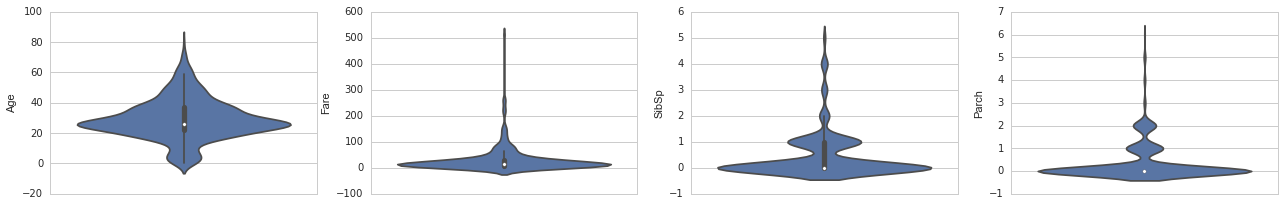

In [61]:
atts = ['Age','Fare','SibSp','Parch']

sns.set_style("whitegrid")

plt.figure(figsize=(22,15))
for index, plots in enumerate(atts):
    plt.subplot(len(vars_to_plot_separate),
               4,
               index +1) # plot them all on one row
    sns.violinplot(y = plots, data= df_imputed)
# https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html

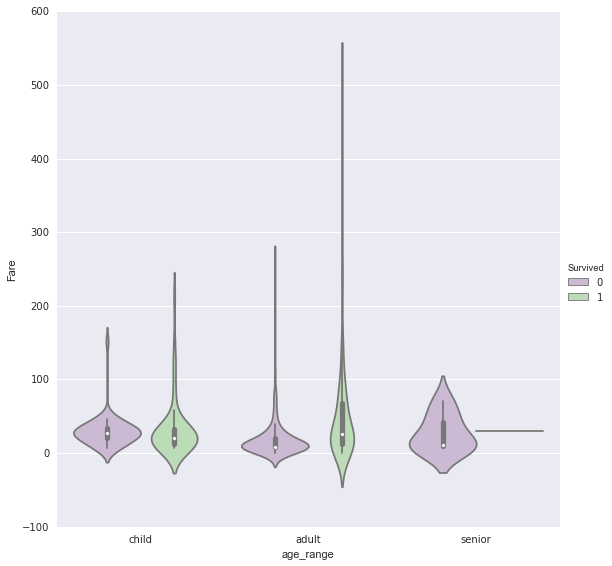

In [60]:
# a factor plot, grouped box plot, broken down by survived status

plt.figure(figsize=(22,15))
# factorplot(x, y, z, dataset, type, palette)
sns.factorplot('age_range','Fare','Survived', df_imputed,
                  kind = 'violin',
                  palette = 'PRGn',
                  size = 8,
                  legend=True)
# http://stanford.edu/~mwaskom/software/seaborn-dev/generated/seaborn.factorplot.html

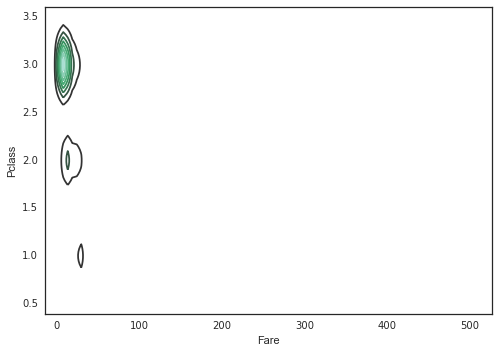

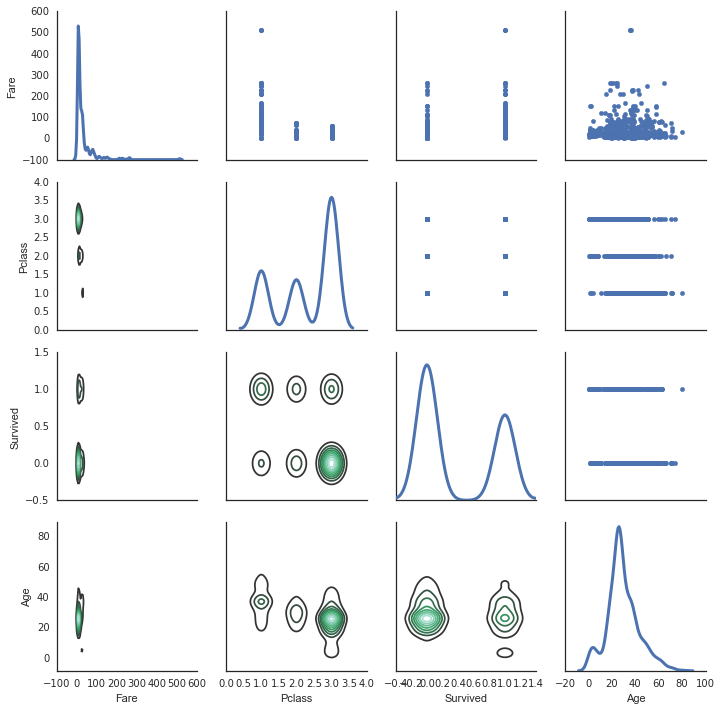

In [73]:
# pairgrid, similar to scatterplot matrix, can do lots of visualiztions
# on one plotting surface
sns.set(style='white')
# https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html
# joint density plot
ax = sns.kdeplot(df_imputed['Fare'], df_imputed['Pclass'])
# KDE = kernel density estimate
# create a pairgrid 

g = sns.PairGrid(df_imputed[['Fare','Pclass', 'Survived', 'Age']], diag_sharey=False)
g.map_lower(sns.kdeplot) # use KDE on lower
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3) # kde histogram on diags

In [75]:
import mpld3

sns.set(style="darkgrid")

g = sns.FacetGrid(df_imputed, col = "age_range", row="Sex", margin_titles=True)
g.map(plt.hist, "Survived",color="steelblue", lw=0)
mpld3.display()

/Users/patrickcorynichols/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


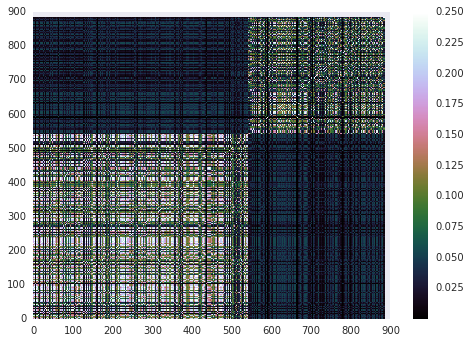

In [77]:
# plotting similarity matrix with matplotlib

from scipy.spatial import distance

sns.set(rc={'image.cmap':'cubehelix'})

# get subset of data and normalize
df_sub = df_imputed[['Survived','Age','Pclass','Fare']]
df_normalized = (df_sub-df_sub.mean()) / (df_sub.std())
df_sorted = df_normalized.sort(columns='Survived')
Y = distance.pdist(df_sorted,"euclidean")
A = distance.squareform(Y)
S = 0.5/(1+np.exp(A)) # convert rom distance to similarity
plt.pcolormesh(S)
plt.colorbar()